In [8]:
import os
import numpy as np

# 일관된 출력을 위해 유사난수 초기화
np.random.seed(42)

%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sn
sn.set()
plt.rcParams['axes.labelsize'] = 14
plt.rcParams['xtick.labelsize'] = 12
plt.rcParams['ytick.labelsize'] = 12

# 한글출력
matplotlib.rc('font', family='Malgun Gothic')  # Windows
plt.rcParams['axes.unicode_minus'] = False

### 5.1 Chap05 - Support Vector Machine

#### Large Margin Classification
- Large Margin Classification 은 오른쪽 그림과 같이 두 데이터의 클래스를 분리할 수 있는 무수히 많은 직선들 중 두 데이터 클래스간의 간격(margin)을 최대로하는 MMH(Maximum Marginal Hyperplane, 최대 마진 초평면)을 찾아 분리하는 방법을 말한다.

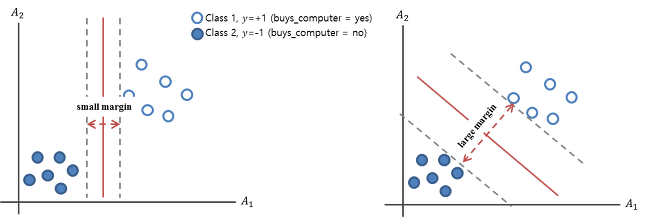

In [44]:
from PIL import Image
img = Image.open("./largemargin.png")
img

In [6]:
from sklearn.svm import SVC
from sklearn import datasets

iris = datasets.load_iris()
X = iris['data'][:,(2,3)]
y = iris['target']

setosa_or_versicolor = (y==0) | (y==1)
X = X[setosa_or_versicolor]
y = y[setosa_or_versicolor]

#SVM 분류 모델
svm_clf = SVC(kernel='linear', C=float('inf'))
svm_clf.fit(X,y)

SVC(C=inf, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='linear',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

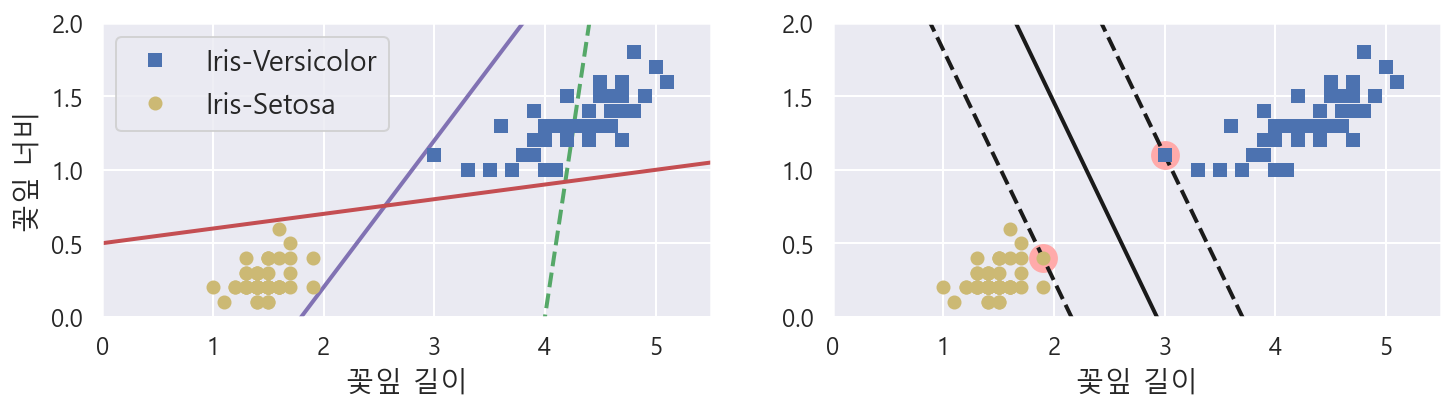

In [9]:
# 나쁜 모델
x0 = np.linspace(0, 5.5, 200)
pred_1 = 5*x0 - 20
pred_2 = x0 - 1.8
pred_3 = 0.1 * x0 + 0.5

def plot_svc_decision_boundary(svm_clf, xmin, xmax):
    w = svm_clf.coef_[0]
    b = svm_clf.intercept_[0]

    # 결정 경계에서 w0*x0 + w1*x1 + b = 0 이므로
    # => x1 = -w0/w1 * x0 - b/w1
    x0 = np.linspace(xmin, xmax, 200)
    decision_boundary = -w[0]/w[1] * x0 - b/w[1]

    margin = 1/w[1]
    gutter_up = decision_boundary + margin
    gutter_down = decision_boundary - margin

    svs = svm_clf.support_vectors_  # support vectors
    plt.scatter(svs[:, 0], svs[:, 1], s=180, facecolors='#FFAAAA')
    plt.plot(x0, decision_boundary, "k-", linewidth=2)
    plt.plot(x0, gutter_up, "k--", linewidth=2)
    plt.plot(x0, gutter_down, "k--", linewidth=2)

plt.figure(figsize=(12,2.7))

plt.subplot(121)
plt.plot(x0, pred_1, "g--", linewidth=2)
plt.plot(x0, pred_2, "m-", linewidth=2)
plt.plot(x0, pred_3, "r-", linewidth=2)
plt.plot(X[:, 0][y==1], X[:, 1][y==1], "bs", label="Iris-Versicolor")
plt.plot(X[:, 0][y==0], X[:, 1][y==0], "yo", label="Iris-Setosa")
plt.xlabel("꽃잎 길이", fontsize=14)
plt.ylabel("꽃잎 너비", fontsize=14)
plt.legend(loc="upper left", fontsize=14)
plt.axis([0, 5.5, 0, 2])

plt.subplot(122)
plot_svc_decision_boundary(svm_clf, 0, 5.5)
plt.plot(X[:, 0][y==1], X[:, 1][y==1], "bs")
plt.plot(X[:, 0][y==0], X[:, 1][y==0], "yo")
plt.xlabel("꽃잎 길이", fontsize=14)
plt.axis([0, 5.5, 0, 2])

plt.show()

- 도로 바깥쪽에 훈련 샘플을 더 추가해도 결정 경계에는 전혀 영향을 미치지 않으며, 도로 경계에 위치한 샘플에 의해 전적으로 결정(의지)됨.
- 위의 그림 중 오른쪽 그래프에서 붉은색으로 표시된 점, 즉 데이터 포인트를 Support Vector라고 하는데 그 이유는 Margin이 이 붉은색으로 표시된 데이터에 의해 결정되기 때문이다.

#### 주의: 특성(Feature)의 스케일에 민감

(-2.0, 2.0, -2.0, 2.0)

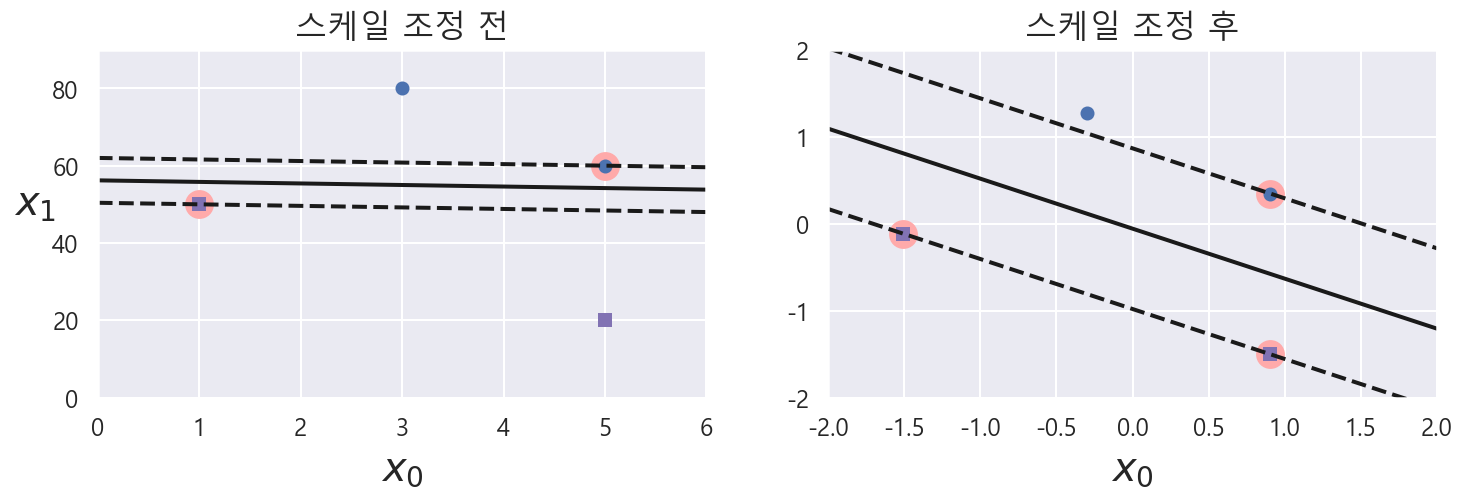

In [14]:
Xs = np.array([[1, 50], [5, 20], [3, 80], [5, 60]]).astype(np.float64)
ys = np.array([0, 0, 1, 1])
svm_clf = SVC(kernel="linear", C=100)
svm_clf.fit(Xs, ys)

plt.figure(figsize=(12,3.2))
plt.subplot(121)
plt.plot(Xs[:, 0][ys==1], Xs[:, 1][ys==1], "bo")
plt.plot(Xs[:, 0][ys==0], Xs[:, 1][ys==0], "ms")
plot_svc_decision_boundary(svm_clf, 0, 6)
plt.xlabel("$x_0$", fontsize=20)
plt.ylabel("$x_1$  ", fontsize=20, rotation=0)
plt.title("스케일 조정 전", fontsize=16)
plt.axis([0, 6, 0, 90])

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(Xs)
svm_clf.fit(X_scaled, ys)

plt.subplot(122)
plt.plot(X_scaled[:, 0][ys==1], X_scaled[:, 1][ys==1], "bo")
plt.plot(X_scaled[:, 0][ys==0], X_scaled[:, 1][ys==0], "ms")
plot_svc_decision_boundary(svm_clf, -2, 2)
plt.xlabel("$x_0$", fontsize=20)
plt.title("스케일 조정 후", fontsize=16)
plt.axis([-2, 2, -2, 2])

### 5.1.1 소프트 마진 분류

- 위와 같이, 모든 샘플이 도로 바깥쪽에 올바르게 분류되어있다면 이를 하드 마진 분류라고 함.
- 하드 마진 분류의 문제점: 데이터가 선형적으로 구분될 수 있어야 제대로 작동하며, 이상치에 민감.
- 도로의 폭을 가능한 넓게 유지하는 것과 마진 오류(샘플이 도로 중간이나 반대쪽에 있는 경우) 사이에 적절한 균형 잡아야 함 => 소프트 마진 분류라고 한다.
- 사이킷런의 SVM 모델에서는 C 하이퍼파라미터를 사용해 이 균형을 조절할 수 있습니다. C값을 줄이면 도로 포
- Tip: SVM 모델이 과적합이라면 C를 감소시켜 모델을 규제할 수 있음.

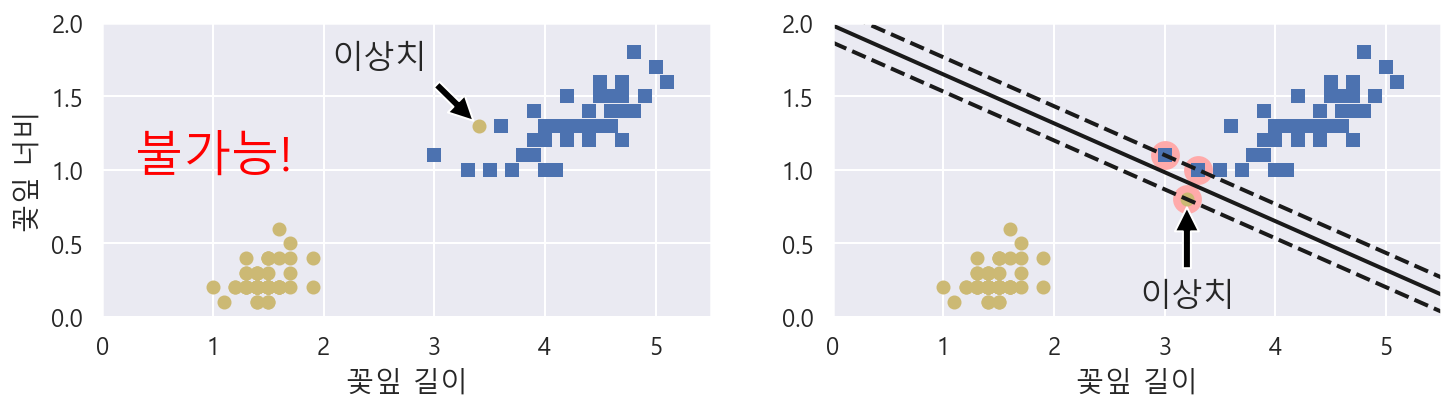

In [15]:
# 이상치에 민감
X_outliers = np.array([[3.4, 1.3], [3.2, 0.8]])
y_outliers = np.array([0, 0])
Xo1 = np.concatenate([X, X_outliers[:1]], axis=0)
yo1 = np.concatenate([y, y_outliers[:1]], axis=0)
Xo2 = np.concatenate([X, X_outliers[1:]], axis=0)
yo2 = np.concatenate([y, y_outliers[1:]], axis=0)

svm_clf2 = SVC(kernel="linear", C=10**9)
svm_clf2.fit(Xo2, yo2)

plt.figure(figsize=(12,2.7))

plt.subplot(121)
plt.plot(Xo1[:, 0][yo1==1], Xo1[:, 1][yo1==1], "bs")
plt.plot(Xo1[:, 0][yo1==0], Xo1[:, 1][yo1==0], "yo")
plt.text(0.3, 1.0, "불가능!", fontsize=24, color="red")
plt.xlabel("꽃잎 길이", fontsize=14)
plt.ylabel("꽃잎 너비", fontsize=14)
plt.annotate("이상치",
             xy=(X_outliers[0][0], X_outliers[0][1]),
             xytext=(2.5, 1.7),
             ha="center",
             arrowprops=dict(facecolor='black', shrink=0.1),
             fontsize=16,
            )
plt.axis([0, 5.5, 0, 2])

plt.subplot(122)
plt.plot(Xo2[:, 0][yo2==1], Xo2[:, 1][yo2==1], "bs")
plt.plot(Xo2[:, 0][yo2==0], Xo2[:, 1][yo2==0], "yo")
plot_svc_decision_boundary(svm_clf2, 0, 5.5)
plt.xlabel("꽃잎 길이", fontsize=14)
plt.annotate("이상치",
             xy=(X_outliers[1][0], X_outliers[1][1]),
             xytext=(3.2, 0.08),
             ha="center",
             arrowprops=dict(facecolor='black', shrink=0.1),
             fontsize=16,
            )
plt.axis([0, 5.5, 0, 2])

plt.show()

위와 같은 문제를 해결하기 위해, 소프트 마진(Soft Margin) SVM이 개발 되었다. 
소프트 마진 SVM은 기본적으로 하드 마진 방법을 기반으로 하는데, 가장 큰 차이점은 Support Vectors가 위치한 경계선에 약간의 여유 변수(Slack Variable)을 두는 것이다.

Scikit-Learn의 SVM 모델에서는 이러한 여유 변수를 C라는 하이퍼파라미터를 제공한다. C는 일종의 penalty라고 볼 수 있음.

 - C 값을 줄이면 오류를 허용하는 정도가 커지며, Margin 또한 커진다.
 - C 값을 크게하면 오류를 허용하는 정도가 작아지며, Margin 또한 작아진다.
아래의 예제코드는 Iris(붓꽃) 데이터셋 중 Virginca 인지 아닌지 분류하는 이진 분류기를 Scikit-Learn의 LinearSVC를 이용해 구현한 코드이다. (힌지 손실 함수를 적용)
여기서 C의 값은 1로 지정했다.

In [2]:
import numpy as np
from sklearn import datasets
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import LinearSVC

iris=datasets.load_iris()
X=iris['data'][:,(2,3)]
y=(iris["target"] == 2).astype(np.float64) #Iris-Virginica

svm_clf = Pipeline([
        ("scaler", StandardScaler()),
        ("linear_svc", LinearSVC(C=1, loss="hinge"))
    ])

svm_clf.fit(X,y)


Pipeline(memory=None,
         steps=[('scaler',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('linear_svc',
                 LinearSVC(C=1, class_weight=None, dual=True,
                           fit_intercept=True, intercept_scaling=1,
                           loss='hinge', max_iter=1000, multi_class='ovr',
                           penalty='l2', random_state=None, tol=0.0001,
                           verbose=0))],
         verbose=False)

##### ▶ LinearSV는 규제에 편향을 포함시킨다. 그래서 훈련 세트에서 평균을 뺴서 중앙에 맞춰야 함.
##### ▶ StandardScaler를 사용하여 데이터 스케일 맞추고, loss 매개변수를 "hinge"로 지정.
##### ▶ 훈련 샘플보다 특성이 많지 않다면 성능을 높이기 위해 dual 매개 변수를 False로 지정

In [3]:
#### ▶ #이 모델을 사용해 예측
svm_clf.predict([[5.5, 1.7]])

array([1.])

#### -> Note: SVM 분류기는 로지스틱 회귀 분류기와는 다르게 클래스에 대한 확률은 제공하지 않음

#### 이번에는 C=1일때와 C=100일때의 결과를 비교해 보자.

In [17]:
scaler = StandardScaler()
svm_clf1 = LinearSVC(C=1, loss="hinge", random_state=42)
svm_clf2 = LinearSVC(C=100, loss="hinge", random_state=42)

scaled_svm_clf1 = Pipeline([
        ("scaler", scaler),
        ("linear_svc", svm_clf1),
    ])
scaled_svm_clf2 = Pipeline([
        ("scaler", scaler),
        ("linear_svc", svm_clf2),
    ])

scaled_svm_clf1.fit(X, y)
scaled_svm_clf2.fit(X, y)

Pipeline(memory=None,
         steps=[('scaler',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('linear_svc',
                 LinearSVC(C=100, class_weight=None, dual=True,
                           fit_intercept=True, intercept_scaling=1,
                           loss='hinge', max_iter=1000, multi_class='ovr',
                           penalty='l2', random_state=42, tol=0.0001,
                           verbose=0))],
         verbose=False)

In [18]:
# 스케일되지 않은 파라미터로 변경
b1 = svm_clf1.decision_function([-scaler.mean_ / scaler.scale_])
b2 = svm_clf2.decision_function([-scaler.mean_ / scaler.scale_])
w1 = svm_clf1.coef_[0] / scaler.scale_
w2 = svm_clf2.coef_[0] / scaler.scale_
svm_clf1.intercept_ = np.array([b1])
svm_clf2.intercept_ = np.array([b2])
svm_clf1.coef_ = np.array([w1])
svm_clf2.coef_ = np.array([w2])

# 서포트 벡터 찾기 (libsvm과 달리 liblinear 라이브러리에서 제공하지 않기 때문에 
# LinearSVC에는 서포트 벡터가 저장되어 있지 않습니다.)
t = y * 2 - 1
support_vectors_idx1 = (t * (X.dot(w1) + b1) < 1).ravel()
support_vectors_idx2 = (t * (X.dot(w2) + b2) < 1).ravel()
svm_clf1.support_vectors_ = X[support_vectors_idx1]
svm_clf2.support_vectors_ = X[support_vectors_idx2]

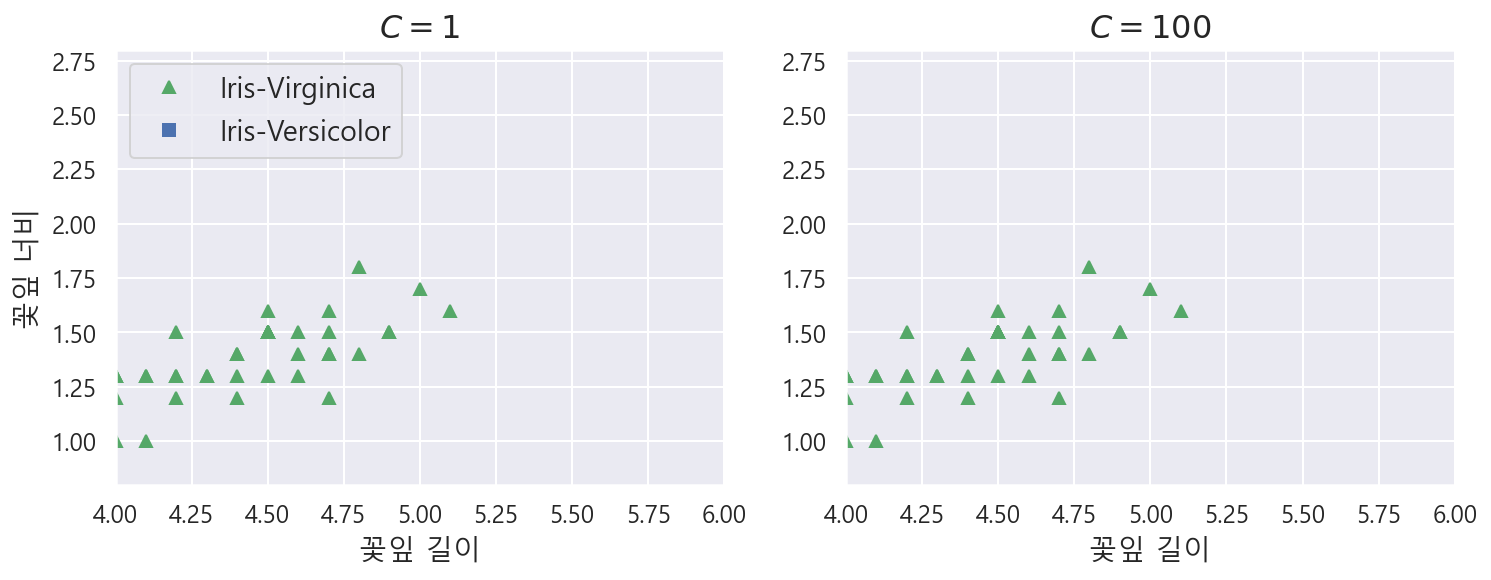

In [19]:
plt.figure(figsize=(12, 4))
plt.subplot(121)
plt.plot(X[:, 0][y==1], X[:, 1][y==1], "g^", label="Iris-Virginica")
plt.plot(X[:, 0][y==0], X[:, 1][y==0], "bs", label="Iris-Versicolor")
plot_svc_decision_boundary(svm_clf1, 4, 6)
plt.xlabel("꽃잎 길이", fontsize=14)
plt.ylabel("꽃잎 너비", fontsize=14)
plt.legend(loc="upper left", fontsize=14)
plt.title("$C = {}$".format(svm_clf1.C), fontsize=16)
plt.axis([4, 6, 0.8, 2.8])

plt.subplot(122)
plt.plot(X[:, 0][y==1], X[:, 1][y==1], "g^")
plt.plot(X[:, 0][y==0], X[:, 1][y==0], "bs")
plot_svc_decision_boundary(svm_clf2, 4, 6)
plt.xlabel("꽃잎 길이", fontsize=14)
plt.title("$C = {}$".format(svm_clf2.C), fontsize=16)
plt.axis([4, 6, 0.8, 2.8]);

### 5.2 비선형 SVM 분류

- 선형 SVM 분류기가 효율적이고, 많은 경우에 아주 잘 작동하나, 선형적으로 분류할 수 없는 데이터셋이 많음.
- 비선형 데이터셋을 다루는 한 가지 방법은 (4장에서 처럼) 다항 특성과 같은 특성을 더 추가하는 것임.
- 이렇게하면 선형적으로 구분되는 데이터셋이 만들어질 수 있음.
- Polynomial Features 변환기와 StandardScaler, LinearSVC를 연결해서 파이프라인을 만들면 좋음.

- 아래의 예제는 $x_1$ 특성에 $x_2 = (x_1)^{2}$ 을 추가하여 2차원의 데이터셋을 만들어 선형분리가 가능하게끔 해준것이다.

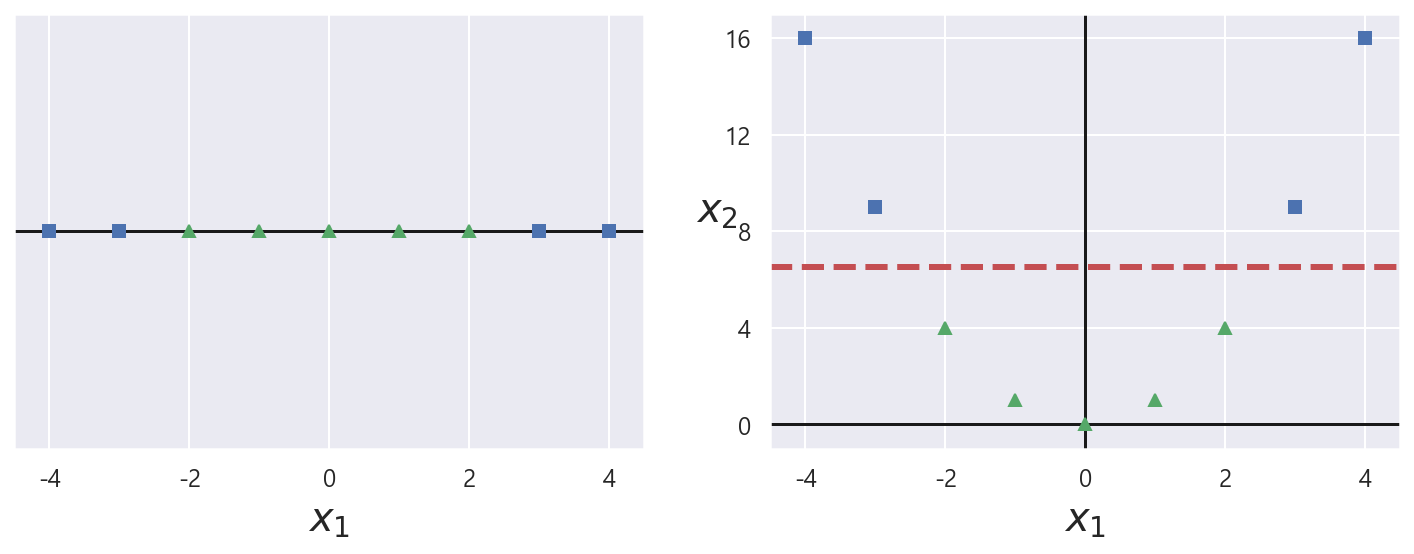

In [20]:
X1D = np.linspace(-4, 4, 9).reshape(-1, 1)
X2D = np.c_[X1D, X1D**2]
y = np.array([0, 0, 1, 1, 1, 1, 1, 0, 0])

plt.figure(figsize=(11, 4))

plt.subplot(121)
plt.grid(True, which='both')
plt.axhline(y=0, color='k')
plt.plot(X1D[:, 0][y==0], np.zeros(4), "bs")
plt.plot(X1D[:, 0][y==1], np.zeros(5), "g^")
plt.gca().get_yaxis().set_ticks([])
plt.xlabel(r"$x_1$", fontsize=20)
plt.axis([-4.5, 4.5, -0.2, 0.2])

plt.subplot(122)
plt.grid(True, which='both')
plt.axhline(y=0, color='k')
plt.axvline(x=0, color='k')
plt.plot(X2D[:, 0][y==0], X2D[:, 1][y==0], "bs")
plt.plot(X2D[:, 0][y==1], X2D[:, 1][y==1], "g^")
plt.xlabel(r"$x_1$", fontsize=20)
plt.ylabel(r"$x_2$", fontsize=20, rotation=0)
plt.gca().get_yaxis().set_ticks([0, 4, 8, 12, 16])
plt.plot([-4.5, 4.5], [6.5, 6.5], "r--", linewidth=3)
plt.axis([-4.5, 4.5, -1, 17])

plt.subplots_adjust(right=1)
plt.show()

#### moons 데이터셋에 적용

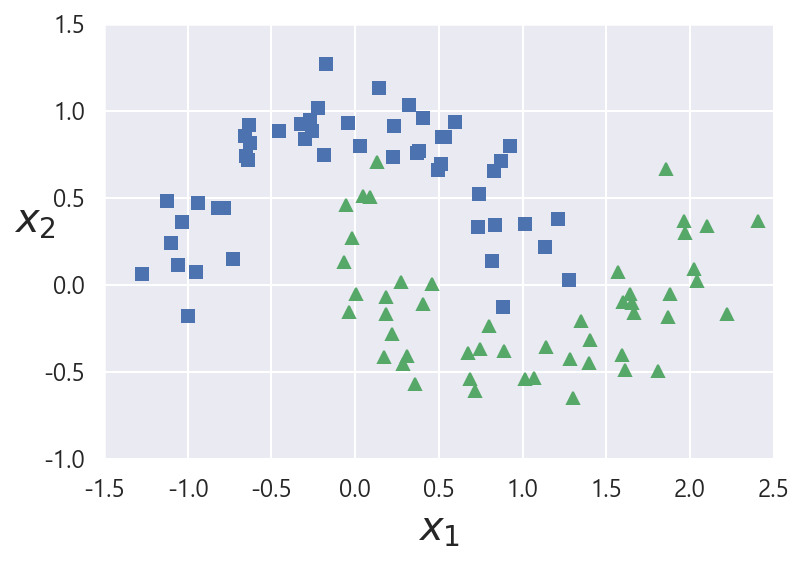

In [22]:
from sklearn.datasets import make_moons

X, y = make_moons(n_samples=100, noise=0.15, random_state=42)

def plot_dataset(X, y, axes):
    plt.plot(X[:, 0][y==0], X[:, 1][y==0], "bs")
    plt.plot(X[:, 0][y==1], X[:, 1][y==1], "g^")
    plt.axis(axes)
    plt.grid(True, which='both')
    plt.xlabel(r"$x_1$", fontsize=20)
    plt.ylabel(r"$x_2$", fontsize=20, rotation=0)

plot_dataset(X, y, [-1.5, 2.5, -1, 1.5])
plt.show()

In [4]:
from sklearn.datasets import make_moons
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures

X, y = make_moons(n_samples=100, noise=0.15, random_state=42)

polynomial_svm_clf = Pipeline([
     ("poly_features", PolynomialFeatures(degree=3)),
     ("scaler", StandardScaler()),
     ("svm_clf", LinearSVC(C=10, loss="hinge", max_iter=2000))    
])

polynomial_svm_clf.fit(X,y)

Pipeline(memory=None,
         steps=[('poly_features',
                 PolynomialFeatures(degree=3, include_bias=True,
                                    interaction_only=False, order='C')),
                ('scaler',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('svm_clf',
                 LinearSVC(C=10, class_weight=None, dual=True,
                           fit_intercept=True, intercept_scaling=1,
                           loss='hinge', max_iter=2000, multi_class='ovr',
                           penalty='l2', random_state=None, tol=0.0001,
                           verbose=0))],
         verbose=False)

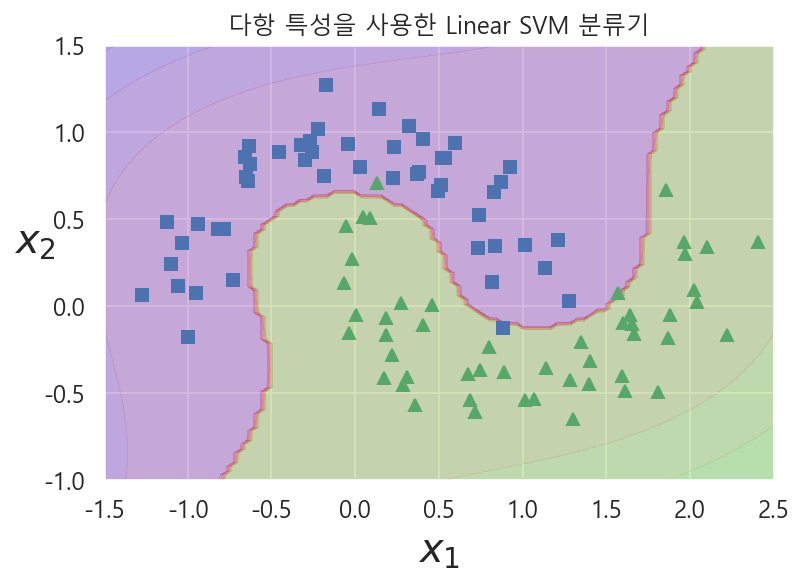

In [23]:
def plot_predictions(clf, axes):
    x0s = np.linspace(axes[0], axes[1], 100)
    x1s = np.linspace(axes[2], axes[3], 100)
    x0, x1 = np.meshgrid(x0s, x1s)
    X = np.c_[x0.ravel(), x1.ravel()]
    y_pred = clf.predict(X).reshape(x0.shape)
    y_decision = clf.decision_function(X).reshape(x0.shape)
    plt.contourf(x0, x1, y_pred, cmap=plt.cm.brg, alpha=0.2)
    plt.contourf(x0, x1, y_decision, cmap=plt.cm.brg, alpha=0.1)

plot_predictions(polynomial_svm_clf, [-1.5, 2.5, -1, 1.5])
plot_dataset(X, y, [-1.5, 2.5, -1, 1.5])
plt.title('다항 특성을 사용한 Linear SVM 분류기')
plt.show()

###  5.2.1 다항식 커널

- 다항식 특성을 추가하는 것은 간단하고 (SVM 뿐만 아니라) 모든 머신러닝 알고리즘에서 잘 작동.
- 하지만 낮은 차수의 다항식은 매우 복잡한 데이터셋을 잘 표현하지 못하고 높은 차수의 다항식은 굉장히 많은 특성을 추가하므로, 모델을 느리게 만듦.
- SVM에서 이를 해결하기 위해 커널 트릭 적용(실제로는 특성을 추가하지 않으면서, 다항식 특성을 많이 추가한 것과 같은 결과를 얻을 수 있음.)

$$
K \left( \mathbf{a}, \mathbf{b} \right) = \left( \gamma \mathbf{a}^{T} \cdot \mathbf{b} + r \right)^{d}
$$

- 아래의 예제 코드는 바로 위의 코드를 kernel trick을 이용해 SVM모델을 만든것이다. Scikit-Lemarn에서 SVC 클래스에서 커널(kernel)을 사용할 수 있다. 
- SVC의 인자 중 coef0은 위의 식에서 $r$에 해당하는 부분이다.
- 커널은 차수가 높아질 수록 r<1 인 값과 r>1인 값의 차이가 크므로 coef0을 적절히 조절하면 고차항의 영향을 줄일 수 있다.

In [34]:
from sklearn.svm import SVC

poly_kernel_svm_clf = Pipeline([
    ('scaler', StandardScaler()),
    ('svm_clf', SVC(kernel='poly', degree=3, coef0=0.1, C=5))
])

poly_kernel_svm_clf.fit(X, y)

Pipeline(memory=None,
         steps=[('scaler',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('svm_clf',
                 SVC(C=5, break_ties=False, cache_size=200, class_weight=None,
                     coef0=0.1, decision_function_shape='ovr', degree=3,
                     gamma='scale', kernel='poly', max_iter=-1,
                     probability=False, random_state=None, shrinking=True,
                     tol=0.001, verbose=False))],
         verbose=False)

- degree: 3차 다항식 커널을 사용해 SVM 분류기를 훈련시킴.
- coef0 : 모델이 높은 차수와 낮은 차수에 얼마나 영향을 받을 지 조절.

In [35]:
poly100_kernel_svm_clf = Pipeline([
        ("scaler", StandardScaler()),
        ("svm_clf", SVC(kernel="poly", degree=3, coef0=100, C=5))
    ])

poly100_kernel_svm_clf.fit(X, y)

Pipeline(memory=None,
         steps=[('scaler',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('svm_clf',
                 SVC(C=5, break_ties=False, cache_size=200, class_weight=None,
                     coef0=100, decision_function_shape='ovr', degree=3,
                     gamma='scale', kernel='poly', max_iter=-1,
                     probability=False, random_state=None, shrinking=True,
                     tol=0.001, verbose=False))],
         verbose=False)

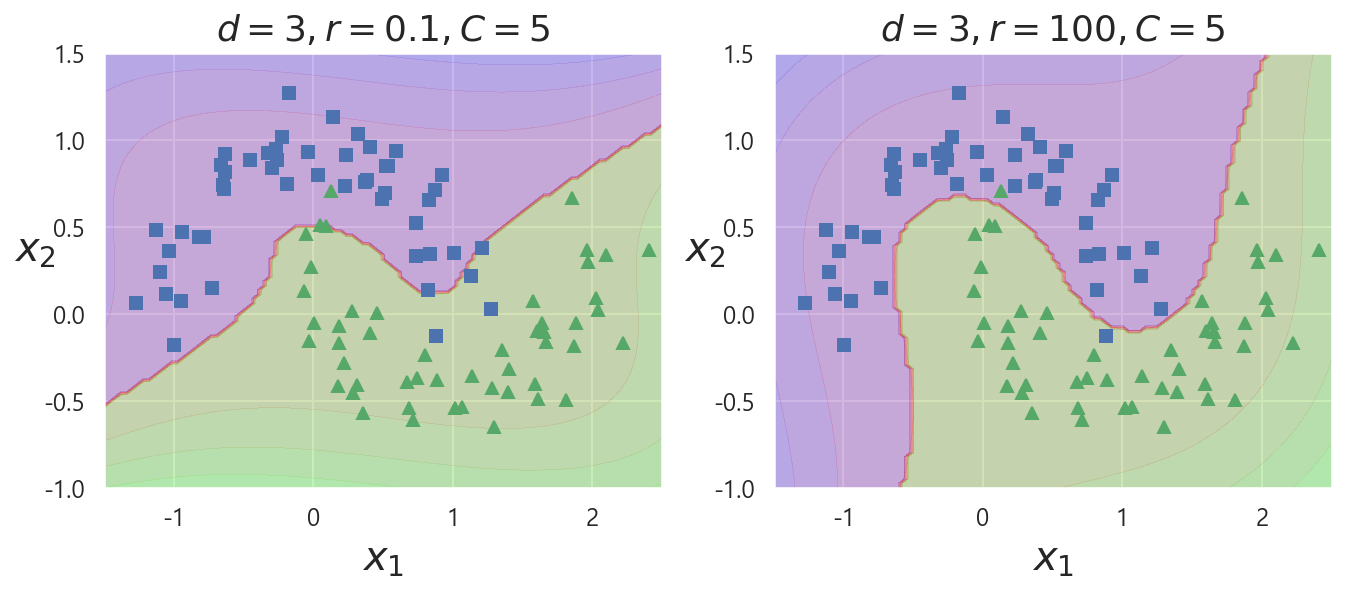

In [36]:
plt.figure(figsize=(11, 4))

plt.subplot(121)
plot_predictions(poly_kernel_svm_clf, [-1.5, 2.5, -1, 1.5])
plot_dataset(X, y, [-1.5, 2.5, -1, 1.5])
plt.title(r"$d=3, r=0.1, C=5$", fontsize=18)

plt.subplot(122)
plot_predictions(poly100_kernel_svm_clf, [-1.5, 2.5, -1, 1.5])
plot_dataset(X, y, [-1.5, 2.5, -1, 1.5])
plt.title(r"$d=3, r=100, C=5$", fontsize=18)

plt.show()

### 5.2.2 유사도 특성 추가

- 비선형 특성을 다루는 또다른 기법은 각 샘플이 특정 랜드마크와 얼마나 닮았는지 측정하는 유사도 함수로 계산한 특성을 추가하는 것임.
- 예를 들어, 아래의 그래프와 같이 $x_2 = -2$와 $x_3 = 1$을 랜드마크라고 하고, $\gamma = 0.3$인 가우시안 RBF(Radial Basis Function, 방사 기저 함수)를 유사도 함수라고 정의해보자.
- 가우시안 RBF : 
$$
\phi_{\gamma} \left( \mathbf{x}, \ell \right) = \text{exp} \left( -\gamma \left\| \mathbf{x} - \ell \right\|^{2} \right)
$$

- $\ell$ : 랜드마크 지점
- $\gamma$ : $\gamma$ > 0 이며, 값이 작을 수록 넓은 종 모양(bell shape)이 됨

예를 들어, $x_1 = -1$일 경우

첫 번째 랜드마크인 $x_1 = -2$에서 $\| -1 - (-2) \| = 1$
두 번째 랜드마크인 $x_2 = 1$에서 $2$
만큼 떨어져 있다.

따라서, $x_1$의 새로운 특성은 $x_2 = \text{exp}(-0.3 \times 1^2) \approx 0.74$ 와 $x_3 = \text{exp}(-0.3 \times 2^2) \approx 0.30$이다.

이러한, 유사도 특성 추가를 통해 아래의 오른쪽 그래프와 같이 선형분리가 가능하다.

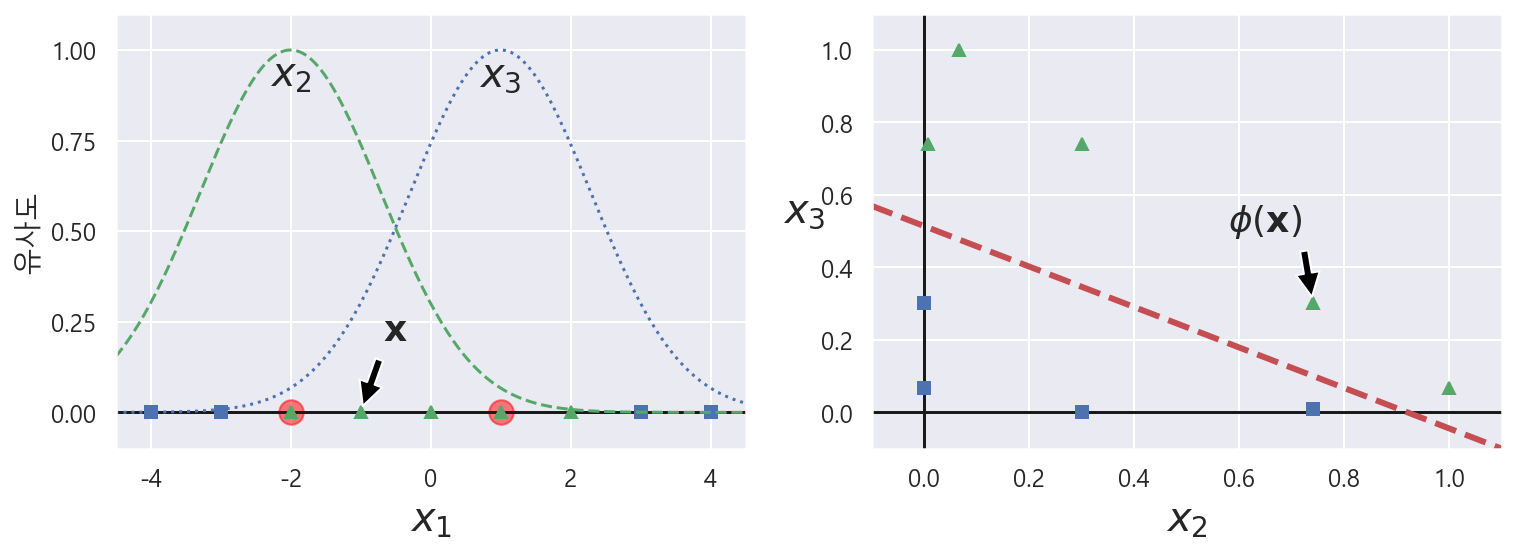

In [37]:
def gaussian_rbf(x, landmark, gamma):
    return np.exp(-gamma * np.linalg.norm(x - landmark, axis=1)**2)

gamma = 0.3

x1s = np.linspace(-4.5, 4.5, 200).reshape(-1, 1)
x2s = gaussian_rbf(x1s, -2, gamma)
x3s = gaussian_rbf(x1s, 1, gamma)

XK = np.c_[gaussian_rbf(X1D, -2, gamma), gaussian_rbf(X1D, 1, gamma)]
yk = np.array([0, 0, 1, 1, 1, 1, 1, 0, 0])

plt.figure(figsize=(11, 4))

plt.subplot(121)
plt.grid(True, which='both')
plt.axhline(y=0, color='k')
plt.scatter(x=[-2, 1], y=[0, 0], s=150, alpha=0.5, c="red")
plt.plot(X1D[:, 0][yk==0], np.zeros(4), "bs")
plt.plot(X1D[:, 0][yk==1], np.zeros(5), "g^")
plt.plot(x1s, x2s, "g--")
plt.plot(x1s, x3s, "b:")
plt.gca().get_yaxis().set_ticks([0, 0.25, 0.5, 0.75, 1])
plt.xlabel(r"$x_1$", fontsize=20)
plt.ylabel(r"유사도", fontsize=14)
plt.annotate(r'$\mathbf{x}$',
             xy=(X1D[3, 0], 0),
             xytext=(-0.5, 0.20),
             ha="center",
             arrowprops=dict(facecolor='black', shrink=0.1),
             fontsize=18,
            )
plt.text(-2, 0.9, "$x_2$", ha="center", fontsize=20)
plt.text(1, 0.9, "$x_3$", ha="center", fontsize=20)
plt.axis([-4.5, 4.5, -0.1, 1.1])

plt.subplot(122)
plt.grid(True, which='both')
plt.axhline(y=0, color='k')
plt.axvline(x=0, color='k')
plt.plot(XK[:, 0][yk==0], XK[:, 1][yk==0], "bs")
plt.plot(XK[:, 0][yk==1], XK[:, 1][yk==1], "g^")
plt.xlabel(r"$x_2$", fontsize=20)
plt.ylabel(r"$x_3$  ", fontsize=20, rotation=0)
plt.annotate(r'$\phi\left(\mathbf{x}\right)$',
             xy=(XK[3, 0], XK[3, 1]),
             xytext=(0.65, 0.50),
             ha="center",
             arrowprops=dict(facecolor='black', shrink=0.1),
             fontsize=18,
            )
plt.plot([-0.1, 1.1], [0.57, -0.1], "r--", linewidth=3)
plt.axis([-0.1, 1.1, -0.1, 1.1])
    
plt.subplots_adjust(right=1)

plt.show()

### 5.2.3 가우시안 RBF 커널

- 위의 5.2.2에서 살펴본 것처럼 유사도 특성을 추가하는 방법도 유용하게 사용될 수 있다. 하지만, 이러한 특성을 추가하기 위해서는 계산 비용이 많이 드는 문제가 있다.

- 이를 가우시안 RBF Kernel을 이용하면 위와 같이 특성들을 계산하지 않고 비슷한 결과를 얻을 수 있다.
$$
K \left( \mathbf{a}, \mathbf{b} \right) = \text{exp} \left( -\gamma \left\| \mathbf{a} - \mathbf{b} \right\|^{2} \right)
$$

- $\gamma$ : regularization 역할을 함
- $\gamma$가 커지면 종 모양이 좁아져 각 데이터의 영향 범위가 작아져, 결정 경계(Decision Boundary)가 불규칙하고 구부러진다.
- $\gamma$가 작아지면 넓은 종 모양이 되며, 데이터의 영향이 넓어져 결정 경계가 부드러워 진다.

In [38]:
rbf_kernel_svm_clf = Pipeline([
        ("scaler", StandardScaler()),
        ("svm_clf", SVC(kernel="rbf", gamma=5, C=0.001))
    ])

rbf_kernel_svm_clf.fit(X, y)

Pipeline(memory=None,
         steps=[('scaler',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('svm_clf',
                 SVC(C=0.001, break_ties=False, cache_size=200,
                     class_weight=None, coef0=0.0,
                     decision_function_shape='ovr', degree=3, gamma=5,
                     kernel='rbf', max_iter=-1, probability=False,
                     random_state=None, shrinking=True, tol=0.001,
                     verbose=False))],
         verbose=False)

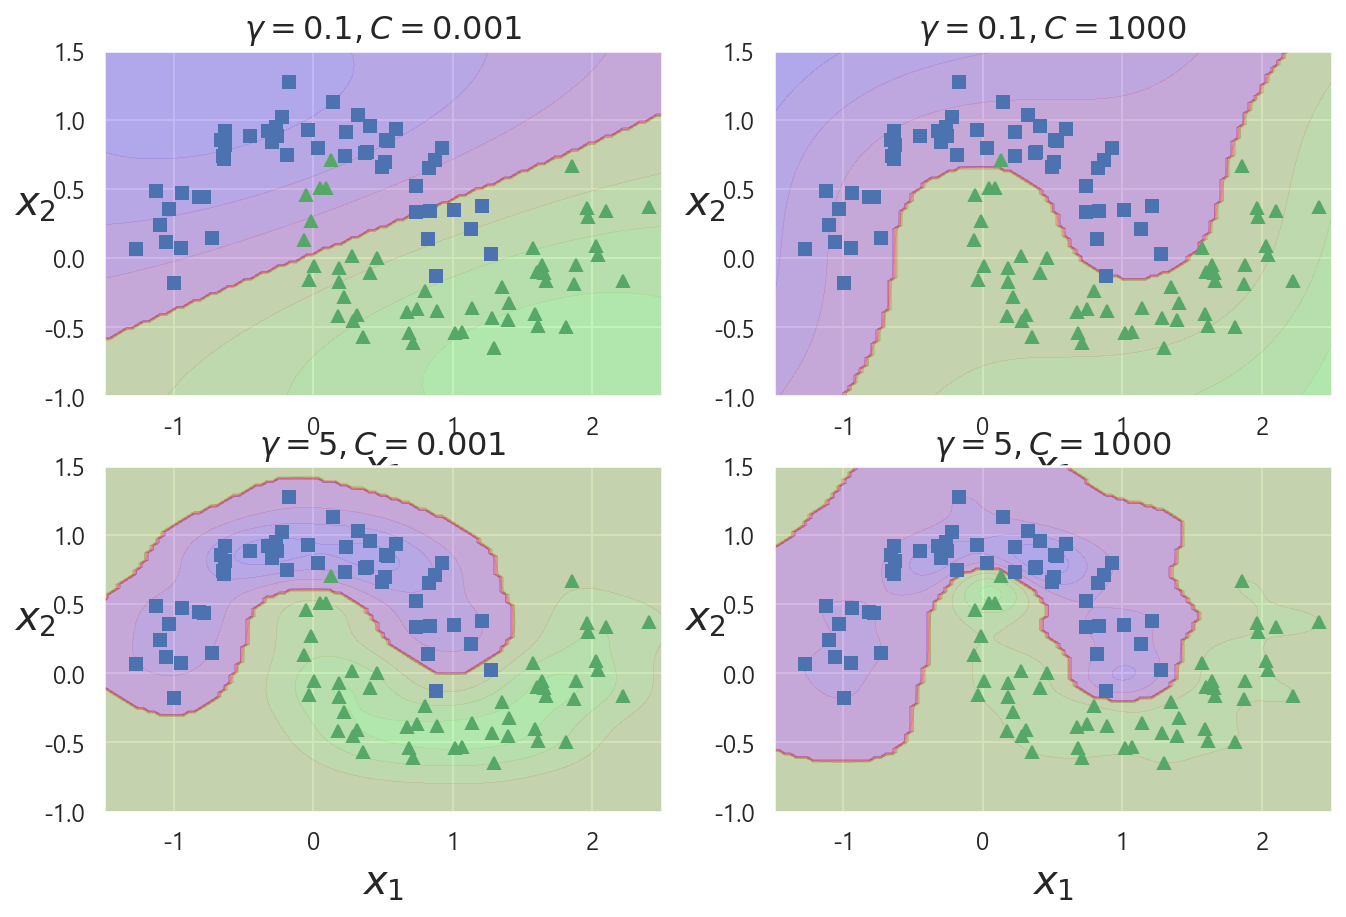

In [39]:
gamma1, gamma2 = 0.1, 5
C1, C2 = 0.001, 1000
hyperparams = (gamma1, C1), (gamma1, C2), (gamma2, C1), (gamma2, C2)

svm_clfs = []
for gamma, C in hyperparams:
    rbf_kernel_svm_clf = Pipeline([
            ("scaler", StandardScaler()),
            ("svm_clf", SVC(kernel="rbf", gamma=gamma, C=C))
        ])
    rbf_kernel_svm_clf.fit(X, y)
    svm_clfs.append(rbf_kernel_svm_clf)

plt.figure(figsize=(11, 7))

for i, svm_clf in enumerate(svm_clfs):
    plt.subplot(221 + i)
    plot_predictions(svm_clf, [-1.5, 2.5, -1, 1.5])
    plot_dataset(X, y, [-1.5, 2.5, -1, 1.5])
    gamma, C = hyperparams[i]
    plt.title(r"$\gamma = {}, C = {}$".format(gamma, C), fontsize=16)

plt.show()

- 감마를 증가시키면 종 모양 그래프가 좁아져서 각 샘플의 영향 범위가 작아짐. 결정 경계가 조금 더 불규칙해지고 각 샘플을 따라 구불구불하게 휘어짐.
- 작은 감마 값은 넓은 종 모양 그래프를 만들며 샘플이 넓은 범위에 걸쳐 영향을 주므로 결정 경계가 더 부드러워 짐.
- 결국 하이퍼파라미터 $gamma$가 규제 역할을 함.
- 모델이 과대적합일 경우엔 감소시켜야하고, 과소적합일 경우엔 증가시켜야 함.(하이퍼 파라미터 C와 비슷)


#### Tip : 어떤 커널(kernel)을 사용할까?
- 가장먼저 선형 커널(linear kernel)을 사용해본다. 
- 특히, Train set이 매우 크거나, 특성 수가 많을 경우에 해당되며, Scikit-Learn에서는 LinearSVC가 SVC(kernel='linear') 보다 훨씬 빠르다.
- Train set이 크지 않다면, 가우시안 RBF 커널을 시도하는 것이 좋고, 대부분의 경우 이 커널이 잘 맞는다고 한다.

### 5.2.4 계산 복잡도

- LinearSVC 파이썬 클래스는 선형 SVM을 위한 최적화된 알고리즘을 구현한 liblinear 라이브러리를 기반으로 합니다.
- 이 라이브러리는 커널 트릭을 지원하지는 않지만 훈련 샘플과 특성 수에 거의 선형적으로 늘어납니다.
- 이 알고리즘의 훈련 시간 복잡도는 대략 O(m*n) 정도입니다.
- 정밀도를 높이면 알고리즘 수행 시간이 길어집니다. 이는 허용 오차 파라미터 $\epsilon$로 조절합니다.(사이킷런에서 매개변수는 tol입니다.)
- 대부분 분류 문제는 허용 오차를 기본 값으로 두면 잘 작동합니다.
- SVC는 커널 트릭 알고리즘을 구현한 libsvm 라이브러리를 기반으로 합니다. 훈련의 시간 복잡도는 보통 O(m^2 * n)과 O(m^3 * n) 사이입니다.
  (훈련 샘플 수가 커지면 엄청나게 느려진다는 것을 의미.)
- 특성의 개수에는, 특히 희소 특성(즉, 각 샘플에 0이 아닌 특성이 몇 개 없는 경우)인 경우에는 잘 확장됨. 
- 이런 경우 알고리즘의 성능이 샘플이 가진 0이 아닌 특성의 평균 수에 거의 비례.

## 5.3 SVM 회귀


#### 5.3 SVM Regression
- SVM은 선형, 비선형 분류 뿐만 아니라 선형, 비선형 회귀(regression)에도 사용할 수 있다.

- SVM을 회귀에 적용하는 방법은 분류와는 반대라고 할 수 있다. 분류에서는 정해진 margin 오류 안에서 두 클래스 간의 폭(너비)가 가능한 최대가 되도록 하는 것이었다. 
- 하지만, SVM 회귀에서는 마진(margin)의 밖이 오류에 해당하며, 마진 안쪽으로 최대한 많은 데이터들이 포함되도록 학습한다.(제한된 마진 오류(도로 밖 샘플) 안에서 도로 안에 가능한 많은 샘플이 들어가도록 학습)
- 도로의 폭은 하이퍼파라미터 $\epsilon$으로 조절



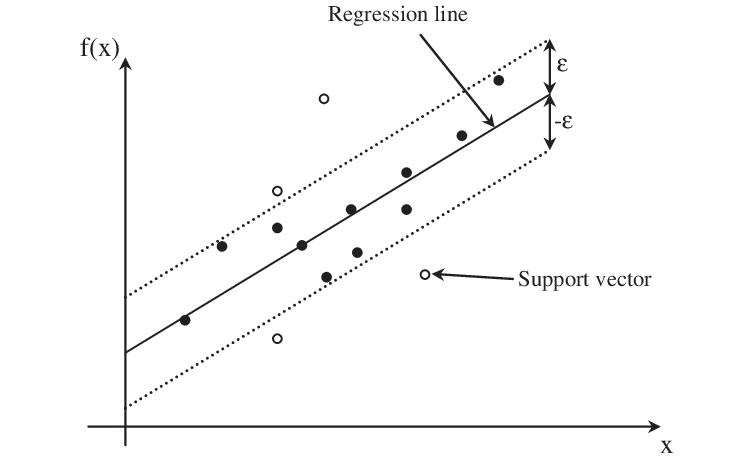

In [43]:
from PIL import Image
img_logo_png = Image.open("./svm-reg.png")
img_logo_png


- 아래의 예제는 Scikit-Learn의 LinearSVR과 SVR 을 이용해 선형, 비선형 SVM 회귀를 적용한 것이다.

#### LinearSVR을 이용한 선형 SVM 회귀
$$
y = 4 + 3x + \text{noise}
$$

In [45]:
np.random.seed(42)
m = 50
X = 2 * np.random.rand(m, 1)
y = (4 + 3 * X + np.random.randn(m, 1)).ravel()

In [46]:
from sklearn.svm import LinearSVR

svm_reg = LinearSVR(epsilon=1.5, random_state=42)
svm_reg.fit(X, y)

LinearSVR(C=1.0, dual=True, epsilon=1.5, fit_intercept=True,
          intercept_scaling=1.0, loss='epsilon_insensitive', max_iter=1000,
          random_state=42, tol=0.0001, verbose=0)

In [47]:
svm_reg1 = LinearSVR(epsilon=1.5, random_state=42)
svm_reg2 = LinearSVR(epsilon=0.5, random_state=42)
svm_reg1.fit(X, y)
svm_reg2.fit(X, y)

def find_support_vectors(svm_reg, X, y):
    y_pred = svm_reg.predict(X)
    off_margin = (np.abs(y - y_pred) >= svm_reg.epsilon)
    return np.argwhere(off_margin)

svm_reg1.support_ = find_support_vectors(svm_reg1, X, y)
svm_reg2.support_ = find_support_vectors(svm_reg2, X, y)

eps_x1 = 1
eps_y_pred = svm_reg1.predict([[eps_x1]])

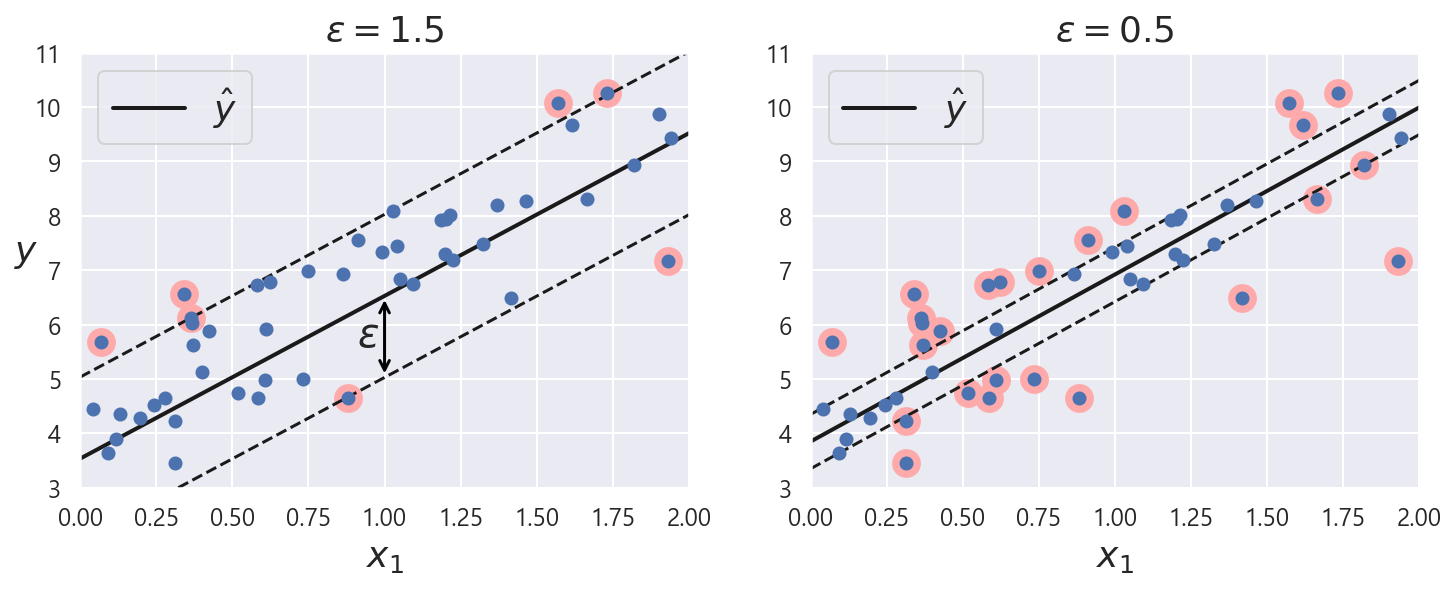

In [48]:
def plot_svm_regression(svm_reg, X, y, axes):
    x1s = np.linspace(axes[0], axes[1], 100).reshape(100, 1)
    y_pred = svm_reg.predict(x1s)
    plt.plot(x1s, y_pred, "k-", linewidth=2, label=r"$\hat{y}$")
    plt.plot(x1s, y_pred + svm_reg.epsilon, "k--")
    plt.plot(x1s, y_pred - svm_reg.epsilon, "k--")
    plt.scatter(X[svm_reg.support_], y[svm_reg.support_], s=180, facecolors='#FFAAAA')
    plt.plot(X, y, "bo")
    plt.xlabel(r"$x_1$", fontsize=18)
    plt.legend(loc="upper left", fontsize=18)
    plt.axis(axes)

plt.figure(figsize=(12, 4))
plt.subplot(121)
plot_svm_regression(svm_reg1, X, y, [0, 2, 3, 11])
plt.title(r"$\epsilon = {}$".format(svm_reg1.epsilon), fontsize=18)
plt.ylabel(r"$y$", fontsize=18, rotation=0)
#plt.plot([eps_x1, eps_x1], [eps_y_pred, eps_y_pred - svm_reg1.epsilon], "k-", linewidth=2)
plt.annotate(
        '', xy=(eps_x1, eps_y_pred), xycoords='data',
        xytext=(eps_x1, eps_y_pred - svm_reg1.epsilon),
        textcoords='data', arrowprops={'arrowstyle': '<->', 'linewidth': 1.5, 'color': 'black'}
    )
plt.text(0.91, 5.6, r"$\epsilon$", fontsize=20)
plt.subplot(122)
plot_svm_regression(svm_reg2, X, y, [0, 2, 3, 11])
plt.title(r"$\epsilon = {}$".format(svm_reg2.epsilon), fontsize=18)
plt.show()

- 위의 그림에서 마진 안쪽으로 Train set이 추가되어도 모델의 예측에는 영향을 주지 않기 때문에, SVM 회귀 모델을 $\epsilon$에 민감하지 않다($\epsilon$-insensitive)라고 한다.

#### SVR을 이용한 비선형 SVM 회귀
$$
y = 0.2 + 0.1x + 0.5 x^{2} + \text{noise}
$$

In [49]:
np.random.seed(42)
m = 100
X = 2 * np.random.rand(m, 1) - 1
y = (0.2 + 0.1 * X + 0.5 * X**2 + np.random.randn(m, 1)/10).ravel()

In [50]:
from sklearn.svm import SVR

svm_poly_reg = SVR(kernel="poly", degree=2, C=100, epsilon=0.1)
svm_poly_reg.fit(X, y)

SVR(C=100, cache_size=200, coef0=0.0, degree=2, epsilon=0.1, gamma='scale',
    kernel='poly', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

In [53]:
svm_poly_reg1 = SVR(kernel="poly", degree=2, C=100, epsilon=0.1)
svm_poly_reg2 = SVR(kernel="poly", degree=2, C=0.01, epsilon=0.1)
svm_poly_reg1.fit(X, y)
svm_poly_reg2.fit(X, y)

SVR(C=0.01, cache_size=200, coef0=0.0, degree=2, epsilon=0.1, gamma='scale',
    kernel='poly', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

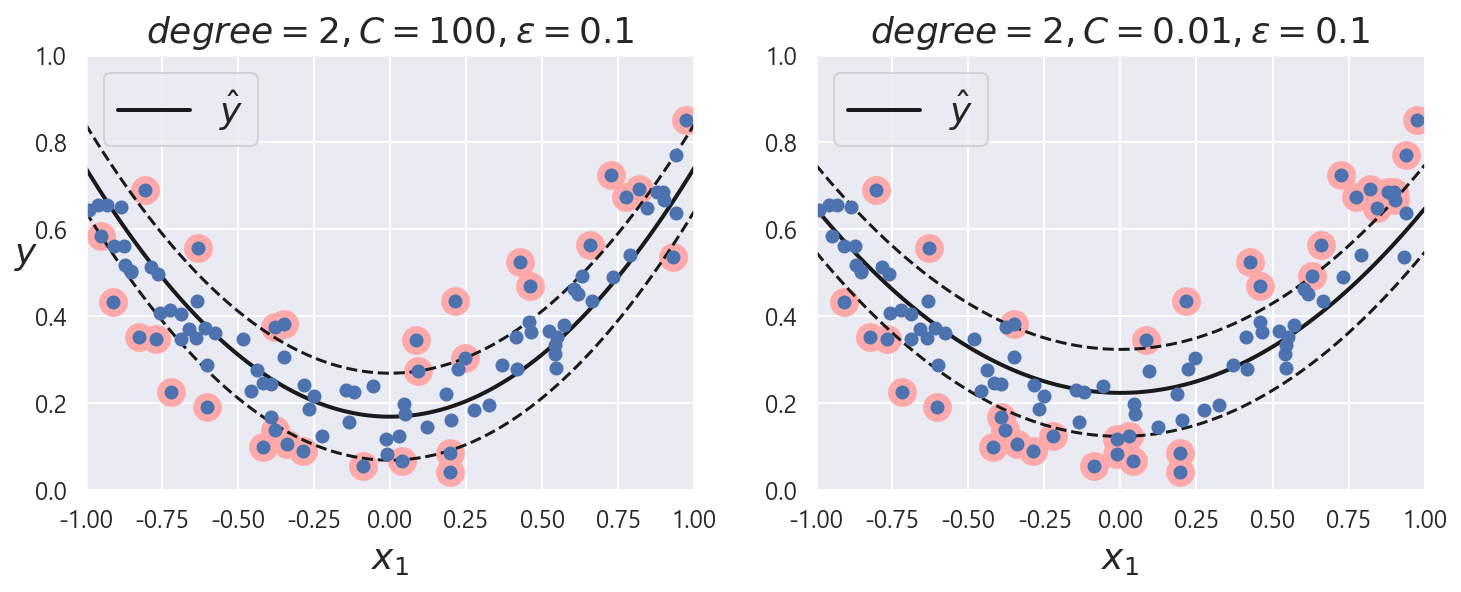

In [54]:
plt.figure(figsize=(12, 4))
plt.subplot(121)
plot_svm_regression(svm_poly_reg1, X, y, [-1, 1, 0, 1])
plt.title(r"$degree={}, C={}, \epsilon = {}$".format(svm_poly_reg1.degree, svm_poly_reg1.C, svm_poly_reg1.epsilon), fontsize=18)
plt.ylabel(r"$y$", fontsize=18, rotation=0)
plt.subplot(122)
plot_svm_regression(svm_poly_reg2, X, y, [-1, 1, 0, 1])
plt.title(r"$degree={}, C={}, \epsilon = {}$".format(svm_poly_reg2.degree, svm_poly_reg2.C, svm_poly_reg2.epsilon), fontsize=18)
plt.show()

- 비선형 회귀 작업을 하려면 커널 SVM 모델 사용. 
- 위의 그림은 임의의 2차 방정식 형태의 훈련 세트에 2차 다항 커널을 사용한 SVM 회귀를 보여줍니다.
- 왼쪽 그래프는 규제가 거의 없고(아주 큰 C), 오른쪽 그래프는 규제가 훨씬 많습니다.(작은 C)